In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка датасета, преимущественно содержащего аномалии (датасет 1)

In [2]:
with open('/home/lyumos/PycharmProjects/anomalies-detection-project/datasets processing/network characteristics dataset/abnormal traffic.csv', 'r') as file:
    df1 = pd.read_csv(file)
df1.head()

,protocol,flow_duration,total_forward_packets,total_backward_packets,total_forward_packets_length,total_backward_packets_length,forward_packet_length_mean,backward_packet_length_mean,forward_packets_per_second,backward_packets_per_second,forward_iat_mean,backward_iat_mean,flow_iat_mean,flow_packets_per_seconds,flow_bytes_per_seconds,label
0,17,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,DrDoS_DNS
1,17,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,DrDoS_DNS
2,17,33509,200,0,88000.0,0.0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,DrDoS_DNS
3,17,288495,200,0,88000.0,0.0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,DrDoS_DNS
4,17,9,2,0,2062.0,0.0,1031.0,0.0,222222.222222,0.0,9.000000,0.0,9.000000,222222.222222,2.291111e+08,DrDoS_DNS


Обработка датасета 1

In [3]:
df1.drop(df1.columns[0], axis=1, inplace=True)
df1.columns = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Fwd Packets/s', 'Bwd Packets/s', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Flow IAT Mean', 'Flow Packets/s', 'Flow Bytes/s', 'Label']
df1.loc[(df1.Label == 'DrDoS_DNS'), 'Label'] = 1
df1.loc[(df1.Label == 'BENIGN'), 'Label'] = 0
df1.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Fwd Packets/s,Bwd Packets/s,Fwd IAT Mean,Bwd IAT Mean,Flow IAT Mean,Flow Packets/s,Flow Bytes/s,Label
0,2468,4,0,1580.0,0.0,395.0,0.0,1620.745543,0.0,822.666667,0.0,822.666667,1620.745543,6.401945e+05,1
1,133,4,0,5888.0,0.0,1472.0,0.0,30075.187970,0.0,44.333333,0.0,44.333333,30075.187970,4.427068e+07,1
2,33509,200,0,88000.0,0.0,440.0,0.0,5968.545764,0.0,168.386935,0.0,168.386935,5968.545764,2.626160e+06,1
3,288495,200,0,88000.0,0.0,440.0,0.0,693.252916,0.0,1449.723618,0.0,1449.723618,693.252916,3.050313e+05,1
4,9,2,0,2062.0,0.0,1031.0,0.0,222222.222222,0.0,9.000000,0.0,9.000000,222222.222222,2.291111e+08,1


Загрузка датасета, содержащего нормальный трафик (датасет 2)

In [5]:
with open('/home/lyumos/PycharmProjects/anomalies-detection-project/datasets processing/network characteristics dataset/benign traffic.csv', 'r') as file:
    df2 = pd.read_csv(file)
df2.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Fwd Packets/s,Bwd Packets/s,Fwd IAT Mean,Bwd IAT Mean,Flow IAT Mean,Flow Packets/s,Flow Bytes/s,Label
0,46870,1,1,44,240,44.0,240.0,21.335609,21.335609,0.0,0.0,46870.0,42.671218,6059.312993,BENIGN
1,62958,1,1,48,80,48.0,80.0,15.883605,15.883605,0.0,0.0,62958.0,31.767210,2033.101433,BENIGN
2,66230,1,1,50,162,50.0,162.0,15.098898,15.098898,0.0,0.0,66230.0,30.197796,3200.966329,BENIGN
3,398250,1,1,55,213,55.0,213.0,2.510986,2.510986,0.0,0.0,398250.0,5.021971,672.944131,BENIGN
4,23544,1,1,43,206,43.0,206.0,42.473666,42.473666,0.0,0.0,23544.0,84.947333,10575.942920,BENIGN


Обработка датасета 2

In [6]:
df2.columns = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Fwd Packets/s', 'Bwd Packets/s', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Flow IAT Mean', 'Flow Packets/s', 'Flow Bytes/s', 'Label']
df2.loc[(df2.Label == 'BENIGN'), 'Label'] = 0
df2.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Fwd Packets/s,Bwd Packets/s,Fwd IAT Mean,Bwd IAT Mean,Flow IAT Mean,Flow Packets/s,Flow Bytes/s,Label
0,46870,1,1,44,240,44.0,240.0,21.335609,21.335609,0.0,0.0,46870.0,42.671218,6059.312993,0
1,62958,1,1,48,80,48.0,80.0,15.883605,15.883605,0.0,0.0,62958.0,31.767210,2033.101433,0
2,66230,1,1,50,162,50.0,162.0,15.098898,15.098898,0.0,0.0,66230.0,30.197796,3200.966329,0
3,398250,1,1,55,213,55.0,213.0,2.510986,2.510986,0.0,0.0,398250.0,5.021971,672.944131,0
4,23544,1,1,43,206,43.0,206.0,42.473666,42.473666,0.0,0.0,23544.0,84.947333,10575.942920,0


Объединение датасетов

In [7]:
df = pd.concat([df1, df2])
df = df.sample(frac=1).reset_index(drop=True)
df.Label.value_counts()

Label
0    192067
1     32797
Name: count, dtype: int64

In [8]:
df.drop(df[df['Label'] == 0].index[:101438], inplace=True)
df.Label.value_counts()

Label
0    90629
1    32797
Name: count, dtype: int64

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

Обработка итогового датасета с сетевыми характеристиками

In [10]:
#нулевых значений нет
df.isnull().sum()

Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Mean         0
Bwd Packet Length Mean         0
Fwd Packets/s                  0
Bwd Packets/s                  0
Fwd IAT Mean                   0
Bwd IAT Mean                   0
Flow IAT Mean                  0
Flow Packets/s                 0
Flow Bytes/s                   0
Label                          0
dtype: int64

In [11]:
#Label из типа данных Object в Category
df['Label'] = df['Label'].astype('category')
df.dtypes

Flow Duration                     int64
Total Fwd Packets                 int64
Total Backward Packets            int64
Total Length of Fwd Packets     float64
Total Length of Bwd Packets     float64
Fwd Packet Length Mean          float64
Bwd Packet Length Mean          float64
Fwd Packets/s                   float64
Bwd Packets/s                   float64
Fwd IAT Mean                    float64
Bwd IAT Mean                    float64
Flow IAT Mean                   float64
Flow Packets/s                  float64
Flow Bytes/s                    float64
Label                          category
dtype: object

In [12]:
#пропусков нет
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(df.isna().any(axis=1).sum(), "строк с как минимум одним значением NaN")
df.dropna(inplace=True)

0 строк с как минимум одним значением NaN


In [13]:
#все значения - не нулевые
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123426 entries, 0 to 123425
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Flow Duration                123426 non-null  int64   
 1   Total Fwd Packets            123426 non-null  int64   
 2   Total Backward Packets       123426 non-null  int64   
 3   Total Length of Fwd Packets  123426 non-null  float64 
 4   Total Length of Bwd Packets  123426 non-null  float64 
 5   Fwd Packet Length Mean       123426 non-null  float64 
 6   Bwd Packet Length Mean       123426 non-null  float64 
 7   Fwd Packets/s                123426 non-null  float64 
 8   Bwd Packets/s                123426 non-null  float64 
 9   Fwd IAT Mean                 123426 non-null  float64 
 10  Bwd IAT Mean                 123426 non-null  float64 
 11  Flow IAT Mean                123426 non-null  float64 
 12  Flow Packets/s               123426 non-null

In [14]:
#удаление дублирующихся строк
print(df.duplicated().sum(), "полностью повторяющихся строк к удалению")
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

4002 полностью повторяющихся строк к удалению


In [15]:
#для составления итогового датасета
df.to_csv('raw_nc_dataset.csv', index=False)

In [16]:
#Уберем из датафрейма метку (для дальнейшего разделения данных на обучающую и тестовую выборки) - получим X:
X = df.loc[:, df.columns != 'Label']
y = df['Label']

In [17]:
#нормализуем данные
scaler = MinMaxScaler()
new_df = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns
)

new_df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Fwd Packets/s,Bwd Packets/s,Fwd IAT Mean,Bwd IAT Mean,Flow IAT Mean,Flow Packets/s,Flow Bytes/s
0,5.896427e-04,0.000000,0.076923,0.000335,0.190505,0.040082,0.399748,0.000004,0.000035,0.000000e+00,0.0,1.179261e-03,0.000007,0.000002
1,4.166792e-07,0.002506,0.000000,0.006125,0.000000,0.366168,0.000000,0.009804,0.000000,4.250000e-07,0.0,8.444444e-07,0.009804,0.007180
2,2.761583e-04,0.498747,0.000000,0.500000,0.000000,0.298913,0.000000,0.001509,0.000000,1.387730e-06,0.0,2.769905e-06,0.001509,0.000902
3,2.534576e-04,0.000000,0.076923,0.000295,0.040865,0.035326,0.085750,0.000008,0.000082,0.000000e+00,0.0,5.069111e-04,0.000016,0.000001
4,1.250038e-07,0.002506,0.000000,0.006455,0.000000,0.385870,0.000000,0.031250,0.000000,1.333333e-07,0.0,2.611111e-07,0.031250,0.024117


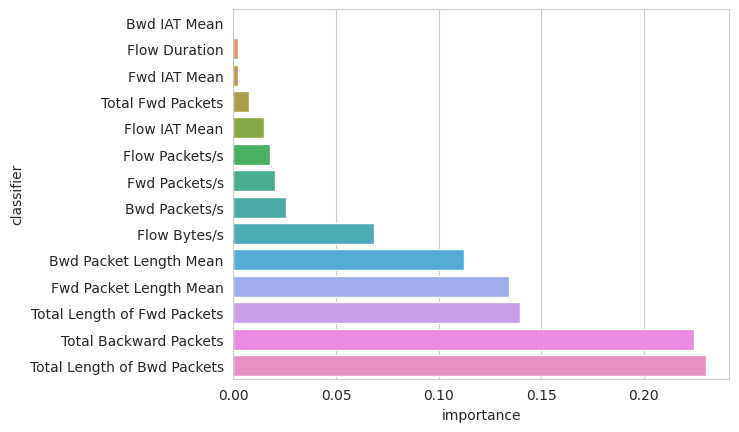

In [18]:
#определение значимости признаков с помощью RF и коэффициента Gini
clf = RandomForestClassifier()
clf.fit(new_df, y)
importances = clf.feature_importances_
classifiers = ['Flow Duration','Total Fwd Packets','Total Backward Packets','Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Fwd Packets/s', 'Bwd Packets/s', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Flow IAT Mean', 'Flow Packets/s', 'Flow Bytes/s']
df_sns = pd.DataFrame({'importance': importances, 'classifier': classifiers})
df_sns = df_sns.sort_values('importance', ascending=True)
sns.barplot(x='importance', y='classifier', data=df_sns)
plt.show()

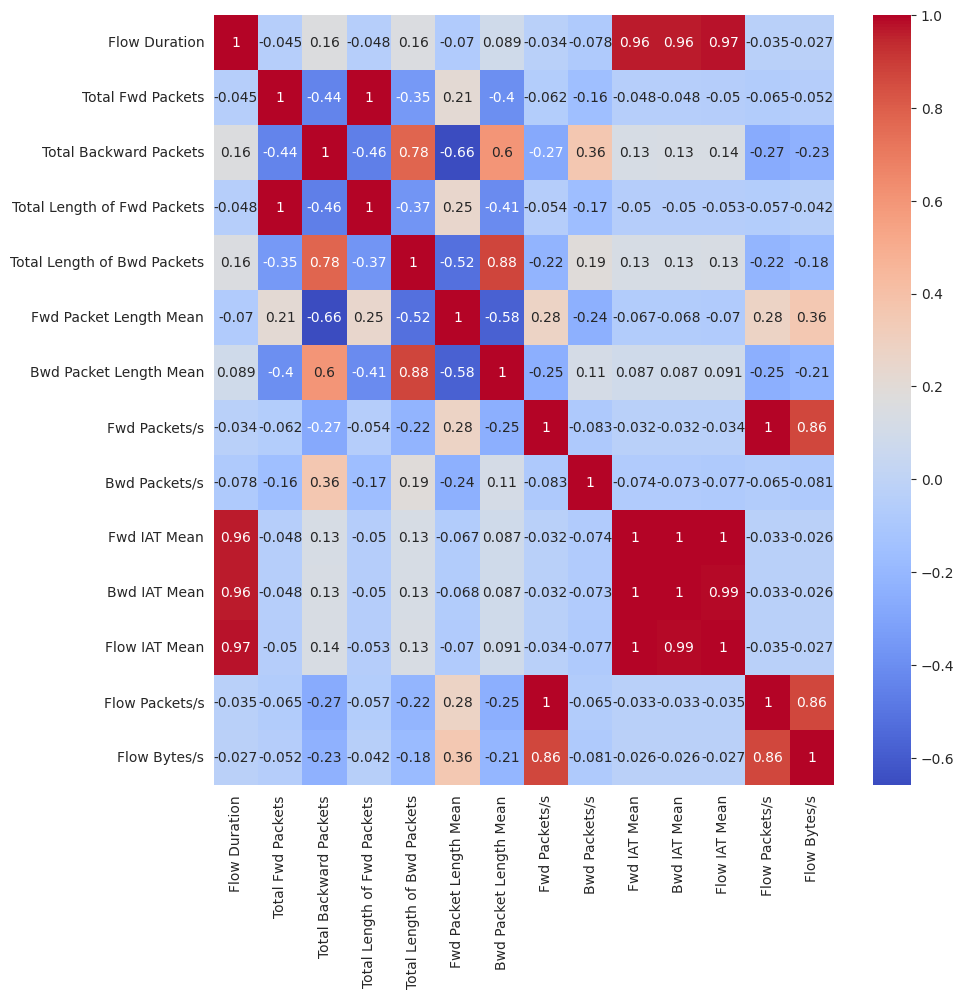

In [19]:
#построение корреляционной матрицы
corr_matrix = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

В результате выбора наиболее значимых признаков по представленным двум диаграммам, были выбраны следующие:
'Flow Duration','Total Fwd Packets','Total Backward Packets', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean', 'Fwd Packets/s', 'Bwd Packets/s'

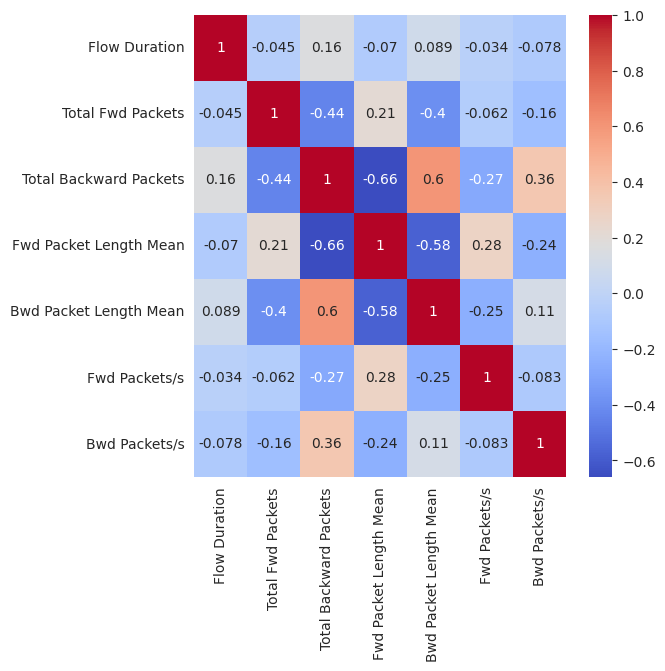

In [20]:
#гиперкорреляции не наблюдается
X1 = df.loc[:, ~df.columns.isin(['Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd IAT Mean', 'Bwd IAT Mean', 'Flow IAT Mean', 'Flow Packets/s', 'Flow Bytes/s', 'Label'])]
check_df = pd.DataFrame(
    scaler.fit_transform(X1),
    columns=X1.columns
)
corr_matrix = check_df.corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [21]:
final_df = pd.concat([check_df, df['Label']], axis=1)
final_df.to_csv('nc_dataset.csv', index=False)